In [24]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

file_path = 'summerOly_athletes.csv'
data = pd.read_csv(file_path)

data.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [25]:
# Filter the dataset for Denmark's performance
denmark_data = data[data['Team'].str.contains('Denmark', na=False)]

# Aggregate the number of medals won per year (excluding "No medal")
denmark_medals = denmark_data[denmark_data['Medal'] != 'No medal'].groupby('Year').size()

# Convert to a DataFrame and ensure the index is a proper datetime type
denmark_medals = denmark_medals.reset_index(name='Medal_Count')
denmark_medals['Year'] = pd.to_datetime(denmark_medals['Year'], format='%Y')
denmark_medals = denmark_medals.set_index('Year')

# Display the aggregated medal counts
denmark_medals.head()

,Medal_Count
Year,
1896-01-01,6
1900-01-01,12
1906-01-01,34
1908-01-01,17
1912-01-01,74


predicted=2.842, expected=13.000
predicted=19.118, expected=7.000
predicted=3.921, expected=14.000
predicted=11.518, expected=23.000
predicted=12.615, expected=25.000
predicted=19.975, expected=29.000
predicted=19.517, expected=16.000
predicted=11.668, expected=16.000
predicted=20.479, expected=41.000
predicted=30.886, expected=33.000
predicted=29.269, expected=41.000
Test RMSE: 10.924


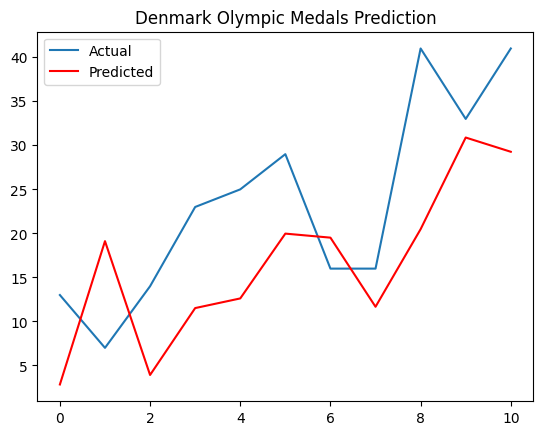

In [26]:
# Prepare the data as a time series
series = denmark_medals['Medal_Count']
series.index = series.index.to_period('Y')

# Split into train and test sets
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[:train_size], X[train_size:]
history = list(train)
predictions = []

# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))  # ARIMA(p=5, d=1, q=0)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={yhat:.3f}, expected={obs:.3f}')

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.title("Denmark Olympic Medals Prediction")
plt.show()

In [28]:
# Extend the ARIMA model to predict the next year's medal count
# Use the full dataset to build the final model

# Fit the model on the entire series
final_model = ARIMA(series, order=(5, 1, 0))  # Use the same (p, d, q) from earlier
final_model_fit = final_model.fit()

# Forecast the next year's medal count
next_year_forecast = final_model_fit.forecast(steps=1)[0]

# Display the prediction for the next year
next_year = series.index[-1] + 2  # Predict for the year following the last observation
print(f"Predicted medal count for {next_year}: {next_year_forecast:.3f}")


Predicted medal count for 2026: 37.123


/tmp/ipykernel_17563/113509805.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_year_forecast = final_model_fit.forecast(steps=1)[0]
